### 쿠팡 웹스크래핑

데이터 분석용 노트북 사기 -- 리뷰가 많고 평점이 높은, 광고는 싫어...

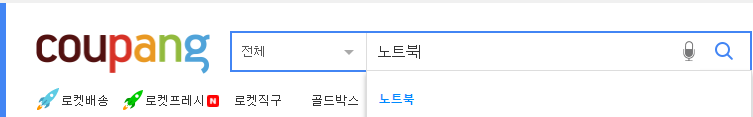

In [1]:
#Import library
from IPython.display import Image
# Load image from local storage
Image(filename = "쿠팡.png", width = 600, height = 300)

HTTP 통신 방식에는 GET 방식과 POST 방식이 있다. 쿠팡은 GET 방식을 사용하고 있고, ? 뒤에 변수와 값은 & 사용하여 요청할 수 있다.

아래 링크는 키워드 "노트북" 으로 검색한 수 5번째 페이지로 이동했을 때 URL 주소

https://www.coupang.com/np/search?q=%EB%85%B8%ED%8A%B8%EB%B6%81&channel=user&component=&eventCategory=SRP&trcid=&traid=&sorter=scoreDesc&minPrice=&maxPrice=&priceRange=&filterType=&listSize=36&filter=&isPriceRange=false&brand=&offerCondition=&rating=0&page=5&rocketAll=false&searchIndexingToken=1=4&backgroundColor=


* GET 방식과 POST 방식 차이 *
웹페이지가 바뀔때마다 URL 주소가 바뀌면 GET 방식, 그렇지 않으면 POST 방식
GET 방식은 전송사이즈 제한이 있고, POST 방식은 없음
GET 방식은 전송하는 변수와 값이 노출되어, ID/PASSWORD 같은 보안이 필요한 것은 POST 방식을 사용하는 것이 좋음

In [2]:
import re
import requests
from bs4 import BeautifulSoup

In [3]:
headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.135 Safari/537.36"}

url = "https://www.coupang.com/np/search?q=%EB%85%B8%ED%8A%B8%EB%B6%81&channel=user&component=&eventCategory=SRP&trcid=&traid=&sorter=scoreDesc&minPrice=&maxPrice=&priceRange=&filterType=&listSize=36&filter=&isPriceRange=false&brand=&offerCondition=&rating=0&page=1&rocketAll=false&searchIndexingToken=1=4&backgroundColor="
res = requests.get(url, headers=headers)
res.raise_for_status() # 문제 있으면 프로그램 종료 시킬 것

soup = BeautifulSoup(res.text, "lxml")

In [ ]:
url ="https://www.coupang.com/np/search?q=%EB%85%B8%ED%8A%B8%EB%B6%81&channel=user&component=&eventCategory=SRP&trcid=&traid=&sorter=scoreDesc&minPrice=&maxPrice=&priceRange=&filterType=&listSize=36&filter=&isPriceRange=false&brand=&offerCondition=&rating=0&page={}&rocketAll=false&searchIndexingToken=1=4&backgroundColor=".format(i)

In [4]:
items = soup.find_all("li", attrs = {"class":re.compile("^search-product")})

In [5]:
print(items[0].find("div", attrs={"class":"name"}).get_text()) # 제품명

삼성 노트북 코어i5 SSD탑재 NT200B5B 블랙, 4GB, SSD256G, 윈도우7


In [6]:
print(items[0].find("strong", attrs={"class":"price-value"}).get_text()) # 가격

299,000


In [7]:
print(items[0].find("em", attrs={"class":"rating"}).get_text()) # 평점

3.5


In [8]:
print(items[0].find("span", attrs={"class":"rating-total-count"}).get_text()) # 리뷰 수

(45)


In [9]:
print(items[0].find("span", attrs={"class":"ad-badge-text"}).get_text()) # 광고 상품

광고


In [10]:
for item in items:
    
    ad_badge = item.find("span", attrs={"class":"ad-badge-text"}) # 광고 상품
    if ad_badge:
        print("<광고 상품 제외합니다>")
        continue
        
    rate = item.find("em", attrs={"class":"rating"}) # 평점
    if rate:
        rate = rate.get_text()
    else:
        # rate = "평점 없음"
        print("<평점없는 상품 제외합니다.>")
        continue
        
    rate_cnt = item.find("span", attrs={"class":"rating-total-count"}) # 리뷰 수
    if rate_cnt:
        rate_cnt = rate_cnt.get_text()  # 예 : (26)
        rate_cnt = rate_cnt[1:-1]
    else:
        #rate_cnt = "평점 수 없음"            
        print("<평점 수 없는 상품 제외합니다.>")
        continue
        
    name = item.find("div", attrs={"class":"name"}).get_text() # 제품명
    if "Apple" in name:
        print("<Apple 상품 제외합니다")
        continue
    
    price = item.find("strong", attrs={"class":"price-value"}).get_text() # 가격
    
    if float(rate) > 4.5 and int(rate_cnt) > 50:  # 평점 4.5 이상이고 평점 수가 50 이상
        print (name, price, rate, rate_cnt)

<광고 상품 제외합니다>
<광고 상품 제외합니다>
<광고 상품 제외합니다>
삼성전자 노트북 플러스 NT550XCR-AD1A 플래티넘 티탄 (Celeron 5205U 39.6cm), NVMe 128GB, 4GB, WIN10 Home 649,000 5.0 58
<광고 상품 제외합니다>
삼성전자 노트북 플러스 NT550XCJ-K78WA 퓨어 화이트 (i7-10510U 39.6cm), NVMe 256GB, 8GB + 8GB, WIN10 Home 1,379,000 5.0 158
<평점없는 상품 제외합니다.>
레노버 ThinkPad 노트북 E595-S01P (Ryzen5 3500U 39.6cm), 256GB, 8GB 678,000 5.0 92
<평점없는 상품 제외합니다.>
<평점없는 상품 제외합니다.>


In [11]:
print(items[0])

<li class="search-product search-product__ad-badge" data-is-rocket="" data-product-id="1681782369" data-vendor-item-id="70854001984" data-winner-vendor-item-id="70854001984" id="1681782369"><a class="search-product-link" data-is-soldout="" data-item-id="2864761049" data-product-id="1681782369" data-srp-log='{"group":"PRODUCT", "itemId":"2864761049", "productId":"1681782369", "vendorItemId":"70854001984", "page":"1", "listSize":"36", "isCcidEligible":false, "displayCcidBadge":false, "wowOnlyInstantDiscountRate": -1, "snsDiscountRate" : -1 }' data-vendor-item-id="70854001984" href="/vp/products/1681782369?itemId=2864761049&amp;vendorItemId=70854001984&amp;sourceType=srp_product_ads" target="_blank"><dl class="search-product-wrap"><dt class="image">  </dt><dd class="descriptions"><div class="descriptions-inner"><div class="badges"> <span class="ad-badge" data-click-uri="https://mercury.coupang.com/e.gif?r=okST8luAPxDA1cqKcmQSg1%2FeXgKUKkV7GGn3i6E9pkK8iP7A3dmRrqB8aANxKCedVXAK%2FpI8gfxjf3K4

In [12]:
print(res.text)


















<!doctype html>
<!--[if lte IE 7 ]><html class="lt-ie9 lt-ie8" lang="ko-KR"><![endif]-->
<!--[if IE 8 ]><html class="lt-ie9" lang="ko-KR"><![endif]-->
<!--[if (gte IE 9)|!(IE)]><!--><html lang="ko-KR"><!--<![endif]-->
<head>
    <meta charset="utf-8" />
    <meta name="google-site-verification" content="zaNrGtrOLMjglkziY2IvmL8dOXyCWHGArDHqFazJQVI" />
    <meta http-equiv="x-dns-prefetch-control" content="on" />
    <link rel="dns-prefetch" href="//cart.coupang.com" />
    <link rel="dns-prefetch" href="//assets.coupang.com" />
    <link rel="dns-prefetch" href="//assets2.coupang.com" />
    <link rel="dns-prefetch" href="//assets.coupangcdn.com" />
    <link rel="dns-prefetch" href="//asset1.coupangcdn.com" />
    <link rel="dns-prefetch" href="//private.coupang.com" />
    <link rel="dns-prefetch" href="//img1a.coupangcdn.com" />
    <link rel="dns-prefetch" href="//image1.coupangcdn.com" />
    <link rel="dns-prefetch" href="//thumbnail1.coupangcdn.com" />
    <link 